In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from tqdm import tqdm

from utils import *

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import seaborn as sns

100%|██████████| 300/300 [00:00<00:00, 374.10it/s]


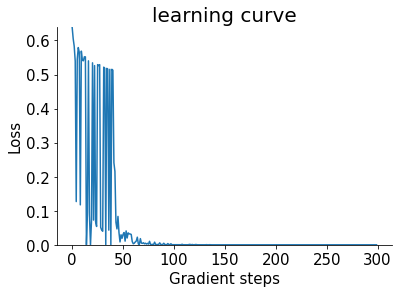

In [2]:
torch.manual_seed(42)

# Initialize RNN
input_size = 2
output_size = 2
fbi_size = 1
bias = True

model = FBI_RNN(input_size, output_size, fbi_size, bias)

# Train network
num_epochs = 300
num_timesteps = 3
eval_step = 2
num_BPTT_steps = 3 #how many steps in the past to backpropagate the error
lr = 0.1
tau = 1
all_patterns = torch.tensor([[0., 1.],
                             [1., 0.],
                             [1., 1.],
                             [0., 0.]])

all_targets  = torch.tensor([[1., 0.],
                             [1., 0.],
                             [0., 1.],
                             [0., 0.]])

data = model.train(lr, num_epochs, num_timesteps, num_BPTT_steps, eval_step, all_patterns, all_targets, tau)

all_patterns, output_history, fbi_history, loss_history, weight_history = data

plt.plot(loss_history)
plt.xlabel('Gradient steps')
plt.ylabel('Loss')
plt.ylim([0,torch.max(loss_history)])
plt.title('learning curve',fontsize=20)
sns.despine()
plt.show()

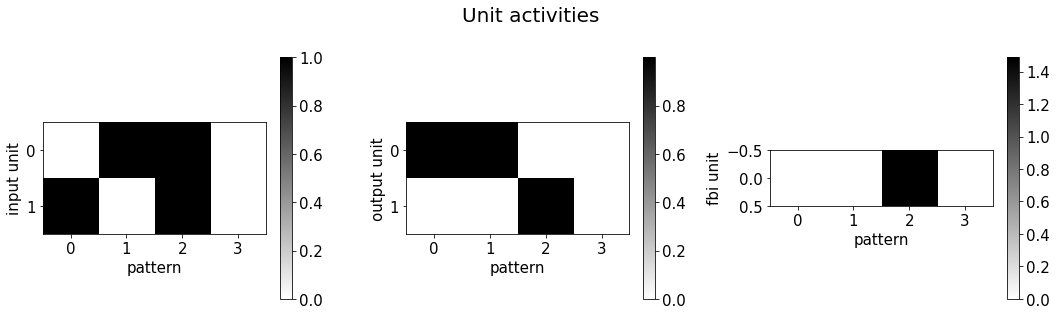

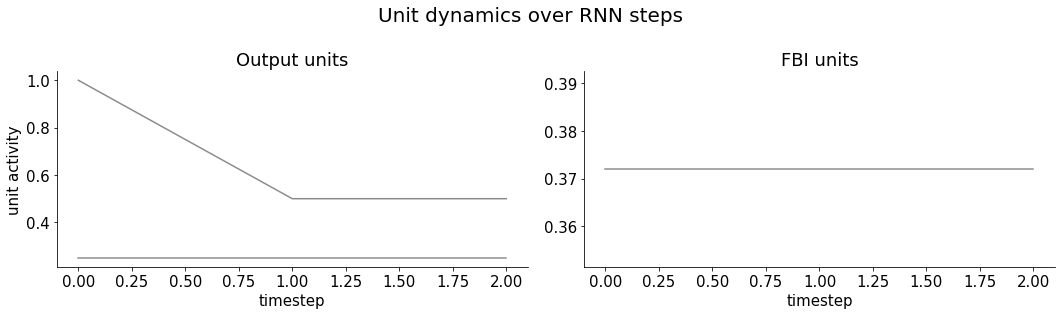

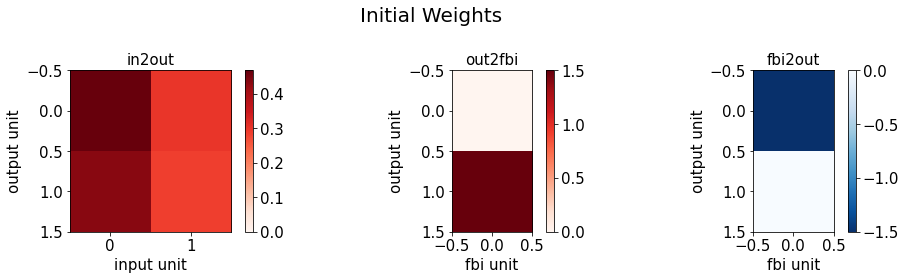

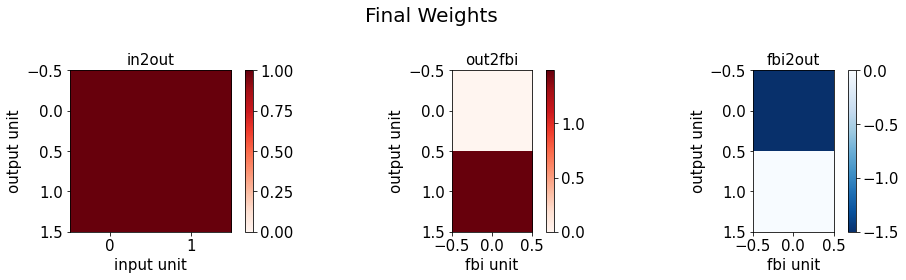

bias = tensor([ 2.2321e-04, -1.0003e+00])


In [3]:
epoch = -1
time = eval_step
plot_summary(time,epoch,data)

if hasattr(model.in2out,'bias'):
    print(f'bias = {model.in2out.bias.detach()}')

In [4]:
epoch = -1
time = eval_step

widgets.interact(plot_activity, time=(0,num_timesteps-1,1), data=fixed(data))
# widgets.interact(plot_activity, epoch=widgets.Play(min=1,max=80));

interactive(children=(IntSlider(value=1, description='time', max=2), Output()), _dom_classes=('widget-interact…

<function utils.plot_activity(time, data)>

/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


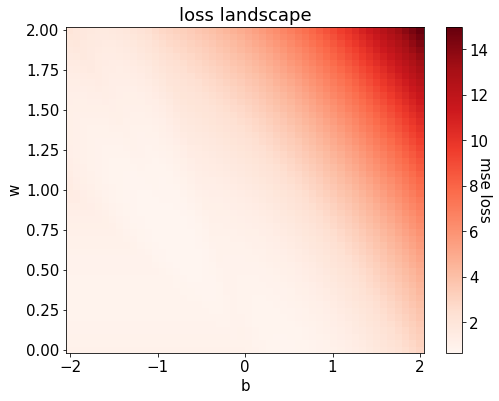

In [5]:
model = FBI_RNN(input_size, output_size, fbi_size,bias=True)
plot_loss_landscape(model, XOR)